In [1]:
import pandas as pd

# Coal

In [22]:
coal = pd.read_excel("Coal_ICE_API2_CIF_ARA_Nr Mth_$MT-SETT. PRICE - Copy.xlsx")

In [23]:

coal["Date"] = pd.to_datetime(coal["Date"])
coal.set_index('Date', inplace=True)
coal.head()


,CoalPriceUsd
Date,
2018-01-01,95.60
2018-01-02,96.65
2018-01-03,96.45
2018-01-04,96.15
2018-01-05,96.25


In [24]:
average_exchange_rate_2018 = 0.8908
average_exchange_rate_2019 = 0.9177
average_exchange_rate_2020 = 0.9383
average_exchange_rate_2021 = 0.8926
average_exchange_rate_2022 = 1.0428
average_exchange_rate_2023 = 0.9553

def convert_usd_to_eur(row, year):
    exchange_rates = {
        2018: average_exchange_rate_2018,
        2019: average_exchange_rate_2019,
        2020: average_exchange_rate_2020,
        2021: average_exchange_rate_2021,
        2022: average_exchange_rate_2022,
        2023: average_exchange_rate_2023,
    }
    return row * exchange_rates.get(year, 1)  # Default to 1 if the year is not found

coal['CoalPriceEur'] = coal.apply(lambda x: convert_usd_to_eur(x['CoalPriceUsd'], x.name.year), axis=1)

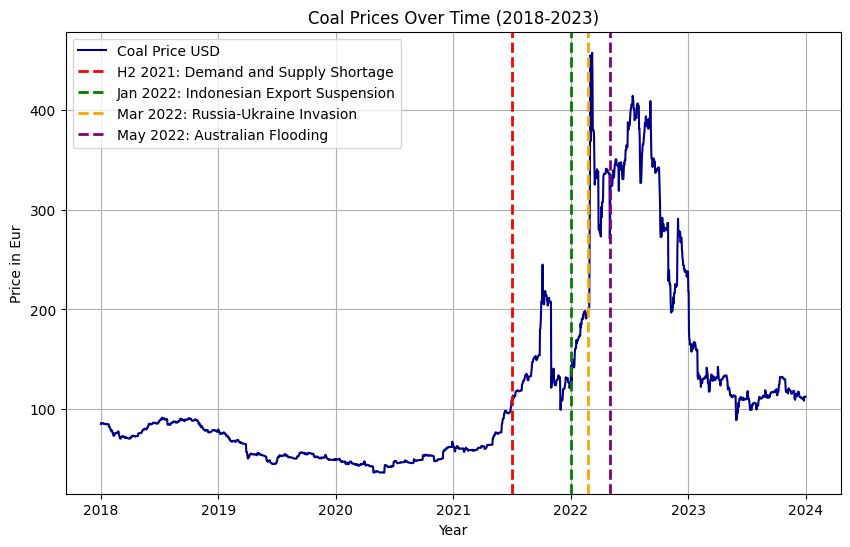

count    2191.000000
mean      123.408832
std        87.930214
min        38.450000
25%        59.400000
50%        95.500000
75%       138.500000
max       439.000000
Name: CoalPriceUsd, dtype: float64

In [26]:
import matplotlib.pyplot as plt

# Plotting coal prices over time
plt.figure(figsize=(10, 6))
plt.plot(coal['CoalPriceEur'], label='Coal Price USD', color='darkblue')

# Adding vertical lines for the significant events
plt.axvline(pd.Timestamp('2021-07-01'), color='red', linestyle='--', lw=2, label='H2 2021: Demand and Supply Shortage')
plt.axvline(pd.Timestamp('2022-01-01'), color='green', linestyle='--', lw=2, label='Jan 2022: Indonesian Export Suspension')
plt.axvline(pd.Timestamp('2022-02-24'), color='orange', linestyle='--', lw=2, label='Mar 2022: Russia-Ukraine Invasion')
plt.axvline(pd.Timestamp('2022-05-01'), color='purple', linestyle='--', lw=2, label='May 2022: Australian Flooding')
#https://www.iea.org/reports/coal-market-update-july-2022/prices


plt.title('Coal Prices Over Time (2018-2023)')
plt.xlabel('Year')
plt.ylabel('Price in Eur')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

# Calculate descriptive statistics
descriptive_stats = coal['CoalPriceUsd'].describe()
descriptive_stats


## Explanation of the coal price timeseries

https://blogg.sintef.no/sintefenergy-nb/politikk/hvordan-pavirker-europeiske-kraft-og-gasspriser-norske-kraftpriser/


After the invasion, several countries responded with sanctions against russia, including an exclusion from the international payment system SWIFT. A range of ountries became reluctant to buy russian coal or even imposed a ban on importing it, including the european union. As the european union, japan and korea collectively accounted for about 40% of russian coal exports, a large portion of russian export was affected. 

(2022)
Soaring gas prices drove up coal fired power generation in many countries, just as economies continued to recover from the pandemic leading to increasing prices. 


(https://iea.blob.core.windows.net/assets/a72a7ffa-c5f2-4ed8-a2bf-eb035931d95c/Coal_2023.pdf)

After hitting its new all time high due to supply constraints and escalated demand following the easing of COVID restrictions and the Ukraine invasion, thermal coal prices began to recede in 2023. However, they remained significantly above pre-crisis levels, indicating a tight market. The market for coal had disparities due to varying supply conditions and geopolitical influences.


The invasion of Ukraine by Russia significantly impacted the European coal market by increasing demand for coal as an alternative to Russian gas, leading to energy security concerns that drove stockpiling behavior and increased coal prices. Adjustments in supply chains and trade routes, coupled with market dynamics and speculation, further exacerbated the situation, leading to a notable increase in coal prices in Europe.

https://www.politico.eu/article/europe-coal-crisis-shortage-war-ukraine-russia-gas-reserves/


The war in Ukraine significantly impacted coal prices in Europe through various channels, emphasizing the intricate connections between geopolitical events, energy security concerns, and market dynamics.

Firstly, the conflict led to an immediate energy crisis in Europe, prompting several EU countries to reactivate or increase the capacity of old coal power plants to mitigate potential energy shortages. This shift occurred despite the EU's overarching goal to reduce emissions and move away from fossil fuels, particularly coal, which has historically been considered a high-polluting energy source 【17†source】.

The imposition of sanctions on Russian coal in April further complicated the situation. With Russia being a major supplier to the EU, the bloc found itself in a position where it had to rapidly source coal from alternative suppliers such as Indonesia, South Africa, and Colombia. This need for alternative sourcing, combined with the already high demand from other global players like India and South Korea, led to a significant spike in coal prices. For example, coal prices on the API2 Rotterdam hub, a European benchmark, experienced a more than fourfold increase compared to the previous year .

Additionally, logistical challenges, such as reduced carrying capacity due to low water levels in key rivers used for transporting coal, further strained the supply, leading to stockpiles of coal being stuck in European ports. This bottleneck in supply not only pushed prices higher but also highlighted the vulnerability of the EU's energy infrastructure to geopolitical tensions and environmental factors .

The surge in coal demand and prices was also driven by a broader global energy market disruption, with coal becoming an attractive short-term alternative to gas amid the lack of sufficient liquid natural gas infrastructure in Europe. Even as the EU aimed to diversify its fossil fuel sources and reduce greenhouse gas emissions, the immediate energy security concerns forced a temporary reliance on coal, illustrating the challenges of balancing climate commitments with energy needs during times of crisis【17†source】.

In summary, the war in Ukraine has had a profound impact on coal prices in Europe, driven by a combination of increased demand, sanctions on Russian energy supplies, logistical challenges, and the urgent need for energy security. This situation underscores the complexities of transitioning to cleaner energy sources while ensuring reliable and affordable energy supplies amidst geopolitical tensions.

[source](https://www.politico.eu/article/europe-coal-crisis-shortage-war-ukraine-russia-gas-reserves/)

## Stationary Transformation

## ADF TEST

In [80]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
import statsmodels

def adf_test(timeseries):
    from statsmodels.tsa.stattools import adfuller
    print('Results of Augmented Dickey-Fuller Test:')
    adf_result = adfuller(timeseries)
    
    # Retrieve the p-value
    adf_pvalue = adf_result[1]
    
    print(f'ADF Statistic: {adf_result[0]}')
    print(f'p-value: {adf_pvalue}')
    
    if adf_pvalue < 0.05:
        print("The series is stationary.")
    else:
        print("The series is non-stationary.")

def kpss_test(timeseries):
    from statsmodels.tsa.stattools import kpss
    print('\nResults of KPSS Test:')
    statistic, p_value, n_lags, critical_values = kpss(timeseries, 'c')
    
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    
    # As the p-value is approximate, it should not be taken as an absolute measure of stationarity.
    if p_value < 0.05:
        print("The series is non-stationary.")
    else:
        print("The series is stationary.")


## Stationary

In [116]:
coal_diff = coal.diff().dropna()


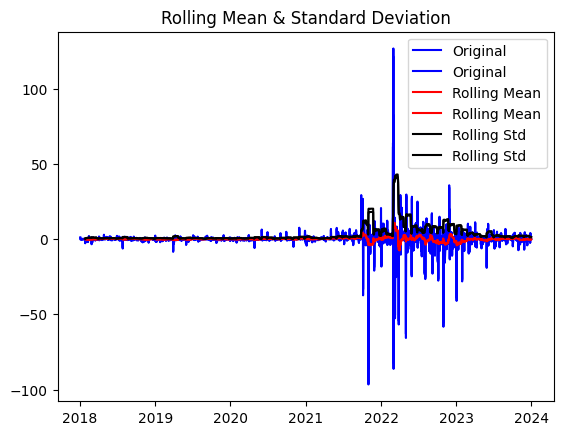

Results of Augmented Dickey-Fuller Test:


ValueError: x is required to have ndim 1 but has ndim 2

In [83]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=24).mean()
    rolstd = timeseries.rolling(window=24).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

test_stationarity(coal_diff)
adf_test(coal_diff)

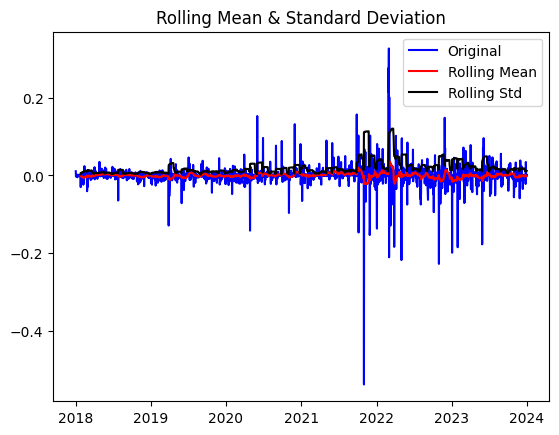

Results of Augmented Dickey-Fuller Test:
ADF Statistic: -21.033760248227814
p-value: 0.0
The series is stationary.


In [41]:
#LOG
#coal_log = np.log(coal)
test_stationarity(coal_log.diff().dropna())
adf_test(coal_log.diff().dropna())

In [119]:
coal_diff = coal_diff["2018-01-01":"2023-12-31"]

In [121]:
import numpy as np
import statsmodels.api as sm

from scipy import stats

def chow_test(x, y, breakpoint):
    # Split the data at the potential breakpoint
    x1, x2 = x[:breakpoint], x[breakpoint:]
    y1, y2 = y[:breakpoint], y[breakpoint:]

    # Fit the model on the entire dataset
    model = sm.OLS(y, sm.add_constant(x)).fit()

    # Fit models on split datasets
    model1 = sm.OLS(y1, sm.add_constant(x1)).fit()
    model2 = sm.OLS(y2, sm.add_constant(x2)).fit()

    # Calculate the F-statistic for the Chow test
    num = (model.ssr - (model1.ssr + model2.ssr)) / 2
    den = (model1.ssr + model2.ssr) / (len(y) - 2 * (model1.df_model + 1))
    f_stat = num / den
    
    # Degrees of freedom
    dfn = model1.df_model + model2.df_model + 1
    dfd = len(y) - 2 * (model1.df_model + 1)
    
    # Use the F distribution to find the p-value
    p_value = 1 - stats.f.cdf(f_stat, dfn, dfd)

    return f_stat, p_value
# Your data
y = coal_diff["CoalPriceEur"].values # Replace 'your_variable_column' with the actual column name
x = np.arange(len(coal_diff)) # Simple integer index for time


breakpoint_index = 1513 # the index corresponding to February 2022 1513 24.febraury
f_stat, p_value = chow_test(x, y, breakpoint_index)

print('F-statistic:', f_stat)
print('p-value:', p_value)

F-statistic: 1.400328038110006
p-value: 0.24087099208926888


In [ ]:
#Converting to hourly
# First, let's set the 'Date' column as the index if it isn't already


# Now, resample the data to an hourly frequency, using forward-fill to propagate the last valid observation
coal_hourly = coal.resample('H').ffill()

# Display the first 24 entries of the resampled hourly DataFrame
coal_hourly.head(29)


# Permits

In [31]:
permit = pd.read_excel("Data\Commodities\EEX-EU_CO2_Emissions_EEUASETT_PRICE.xlsx")

In [52]:

permit["Date"] = pd.to_datetime(permit["Date"])
permit.set_index('Date', inplace=True)
permit.head()

,Carbon_permit_price_Euro
Date,
2018-01-01,7.77
2018-01-02,7.77
2018-01-03,7.80
2018-01-04,7.74
2018-01-05,7.75


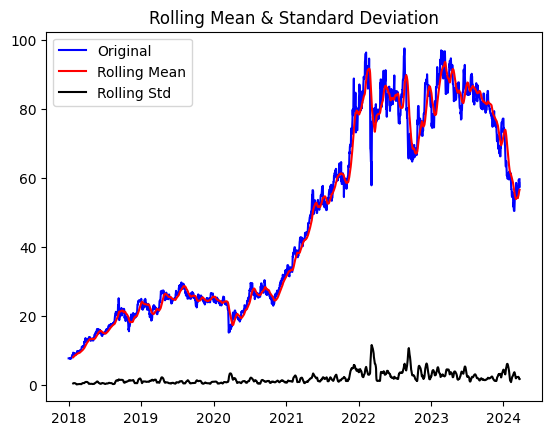

Results of Augmented Dickey-Fuller Test:
ADF Statistic: -1.5087428317741594
p-value: 0.5291820368426806
The series is non-stationary.


In [63]:
test_stationarity(permit)
adf_test(permit)

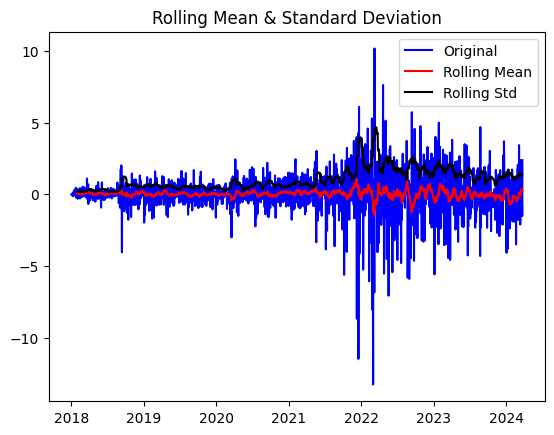

Results of Augmented Dickey-Fuller Test:
ADF Statistic: -18.918721184643964
p-value: 0.0
The series is stationary.


In [53]:
test_stationarity(permit.diff().dropna())
adf_test(permit.diff().dropna())

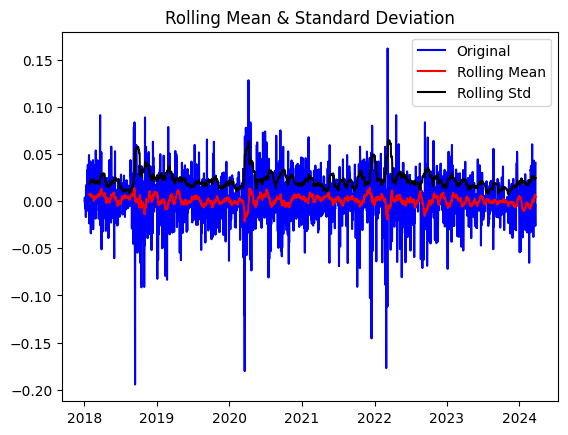

Results of Augmented Dickey-Fuller Test:
ADF Statistic: -18.638854824952897
p-value: 2.0548209035476835e-30
The series is stationary.


In [60]:
#LOG
permit_log = np.log(permit)
test_stationarity(permit_log.diff().dropna())
adf_test(permit_log.diff().dropna())

In [ ]:
#Resampling to hourly format
permit_hourly = permit.resample('H').ffill()
permit_hourly.head(29)

# GAS

In [10]:
gas = pd.read_excel("Data\\Commodities\\Natural gas spot daily.xlsx")
gas

,Date,GasPrice
0,2017-03-13,16.55
1,2017-03-14,16.18
2,2017-03-15,16.45
3,2017-03-16,16.57
4,2017-03-17,16.35
...,...,...
1823,2024-03-07,26.24
1824,2024-03-08,26.55
1825,2024-03-11,25.40
1826,2024-03-12,25.03


In [11]:
gas["Date"] = pd.to_datetime(gas["Date"])
gas.set_index('Date', inplace=True)
gas.head()

,GasPrice
Date,
2017-03-13,16.55
2017-03-14,16.18
2017-03-15,16.45
2017-03-16,16.57
2017-03-17,16.35


<Axes: xlabel='Date'>

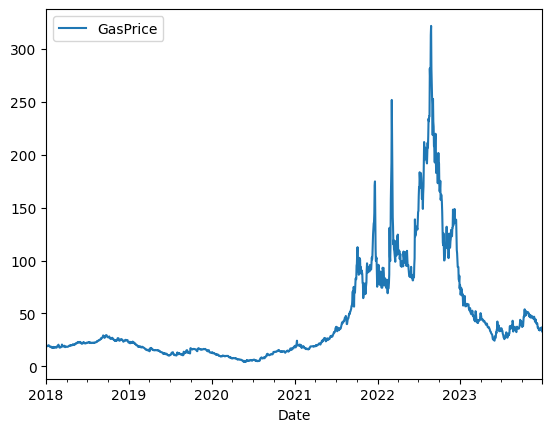

In [20]:
gas_filtered = gas["2018-01-01":"2023-12-31"]
gas_filtered.plot()

Results of Augmented Dickey-Fuller Test:
ADF Statistic: -11.730894940221308
p-value: 1.3425241490409993e-21
The series is stationary.


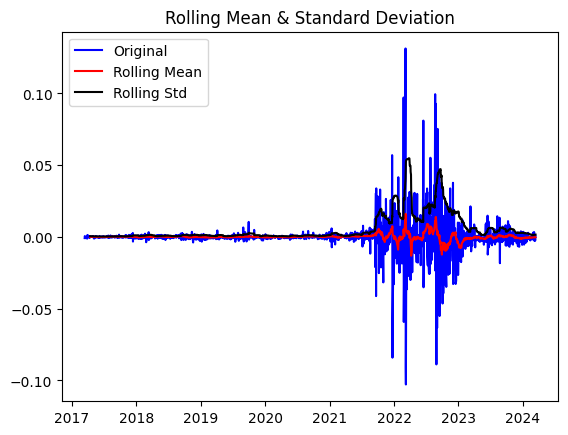

In [113]:
adf_test(gas_filtered.diff().dropna())
gas_stationary = gas_filtered.diff().dropna()
test_stationarity(gas_stationary)

In [115]:
import numpy as np
import statsmodels.api as sm

from scipy import stats

def chow_test(x, y, breakpoint):
    # Split the data at the potential breakpoint
    x1, x2 = x[:breakpoint], x[breakpoint:]
    y1, y2 = y[:breakpoint], y[breakpoint:]

    # Fit the model on the entire dataset
    model = sm.OLS(y, sm.add_constant(x)).fit()

    # Fit models on split datasets
    model1 = sm.OLS(y1, sm.add_constant(x1)).fit()
    model2 = sm.OLS(y2, sm.add_constant(x2)).fit()

    # Calculate the F-statistic for the Chow test
    num = (model.ssr - (model1.ssr + model2.ssr)) / 2
    den = (model1.ssr + model2.ssr) / (len(y) - 2 * (model1.df_model + 1))
    f_stat = num / den
    
    # Degrees of freedom
    dfn = model1.df_model + model2.df_model + 1
    dfd = len(y) - 2 * (model1.df_model + 1)
    
    # Use the F distribution to find the p-value
    p_value = 1 - stats.f.cdf(f_stat, dfn, dfd)

    return f_stat, p_value
# Your data
y = gas_stationary.values # Replace 'your_variable_column' with the actual column name
x = np.arange(len(gas_stationary)) # Simple integer index for time


breakpoint_index = 1113 # the index corresponding to February 2022 1513 24.febraury
f_stat, p_value = chow_test(x, y, breakpoint_index)

print('F-statistic:', f_stat)
print('p-value:', p_value)

F-statistic: 0.8928925519091445
p-value: 0.444073816640549


# Brent

In [69]:
brent = pd.read_excel("C:\\Users\\mathi\\OneDrive\\Dokumenter\\GitHub\\MasterThesis-\\Data\\Cleaned Data\\BrentOilcleanH.xlsx")
brent

,Date,Price
0,2018-01-02 00:00:00,66.57
1,2018-01-02 01:00:00,66.57
2,2018-01-02 02:00:00,66.57
3,2018-01-02 03:00:00,66.57
4,2018-01-02 04:00:00,66.57
...,...,...
52484,2023-12-28 20:00:00,78.39
52485,2023-12-28 21:00:00,78.39
52486,2023-12-28 22:00:00,78.39
52487,2023-12-28 23:00:00,78.39


In [70]:
#brent = brent["Last Price"]
brent["Date"] = pd.to_datetime(brent["Date"])
brent.set_index('Date', inplace=True)
brent.head()


,Price
Date,
2018-01-02 00:00:00,66.57
2018-01-02 01:00:00,66.57
2018-01-02 02:00:00,66.57
2018-01-02 03:00:00,66.57
2018-01-02 04:00:00,66.57


In [71]:
brent['oilPriceEur'] = brent.apply(lambda x: convert_usd_to_eur(x['Price'], x.name.year), axis=1)

In [76]:
daily_brent = brent['oilPriceEur'].resample('D').last()

Results of Augmented Dickey-Fuller Test:
ADF Statistic: -1.5163799033636793
p-value: 0.5253934354606656
The series is non-stationary.


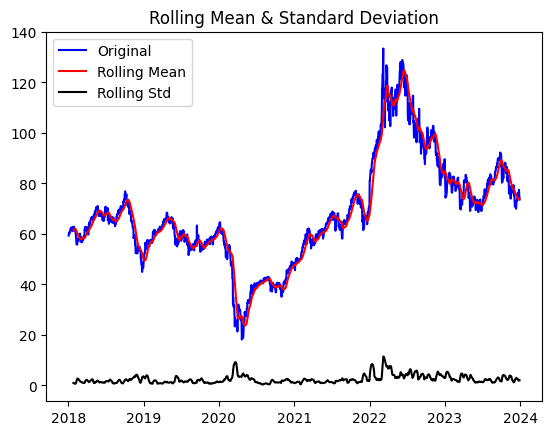

In [84]:
adf_test(daily_brent)
test_stationarity(daily_brent)

Results of Augmented Dickey-Fuller Test:
ADF Statistic: -17.998211315966653
p-value: 2.7398550277118835e-30
The series is stationary.


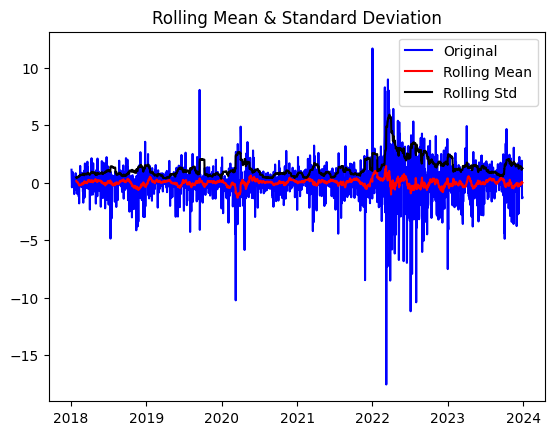

In [85]:
adf_test(daily_brent.diff().dropna())
test_stationarity(daily_brent.diff().dropna())

In [89]:
brent_stationary = daily_brent.diff().dropna()
brent_stationary["2022-02-24"]


2.335871999999995

In [93]:
brent_stationary.index.get_loc("2022-02-24")

1513

In [105]:
import numpy as np
import statsmodels.api as sm

from scipy import stats

def chow_test(x, y, breakpoint):
    # Split the data at the potential breakpoint
    x1, x2 = x[:breakpoint], x[breakpoint:]
    y1, y2 = y[:breakpoint], y[breakpoint:]

    # Fit the model on the entire dataset
    model = sm.OLS(y, sm.add_constant(x)).fit()

    # Fit models on split datasets
    model1 = sm.OLS(y1, sm.add_constant(x1)).fit()
    model2 = sm.OLS(y2, sm.add_constant(x2)).fit()

    # Calculate the F-statistic for the Chow test
    num = (model.ssr - (model1.ssr + model2.ssr)) / 2
    den = (model1.ssr + model2.ssr) / (len(y) - 2 * (model1.df_model + 1))
    f_stat = num / den
    
    # Degrees of freedom
    dfn = model1.df_model + model2.df_model + 1
    dfd = len(y) - 2 * (model1.df_model + 1)
    
    # Use the F distribution to find the p-value
    p_value = 1 - stats.f.cdf(f_stat, dfn, dfd)

    return f_stat, p_value
# Your data
y = brent_stationary.values # Replace 'your_variable_column' with the actual column name
x = np.arange(len(brent_stationary)) # Simple integer index for time


breakpoint_index = 1513 # the index corresponding to February 2022 1513 24.febraury
f_stat, p_value = chow_test(x, y, breakpoint_index)

print('F-statistic:', f_stat)
print('p-value:', p_value)


F-statistic: 1.3713359047573959
p-value: 0.24971692072013152


## PLotting commodoties

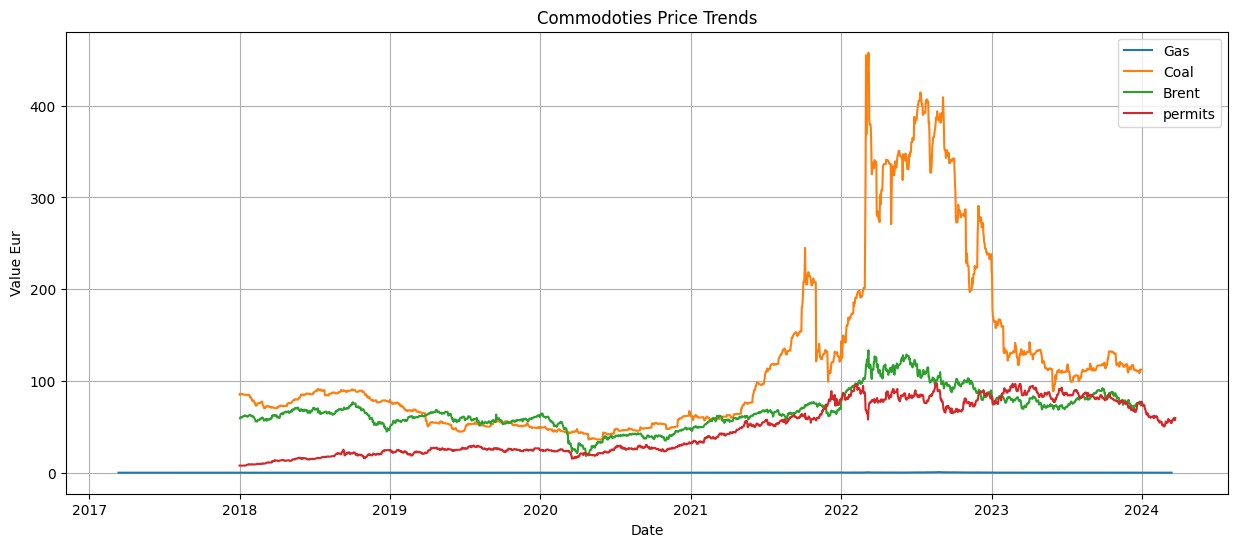

In [78]:


# Plotting
plt.figure(figsize=(15, 6))
plt.plot(gas_filtered.index, gas_filtered, label='Gas')
plt.plot(coal.index, coal['CoalPriceEur'], label='Coal')
plt.plot(daily_brent.index, daily_brent, label='Brent')
plt.plot(permit.index, permit, label='permits')

plt.title('Commodoties Price Trends')
plt.xlabel('Date')
plt.ylabel('Value Eur')
plt.legend()
plt.grid(True)
plt.show()

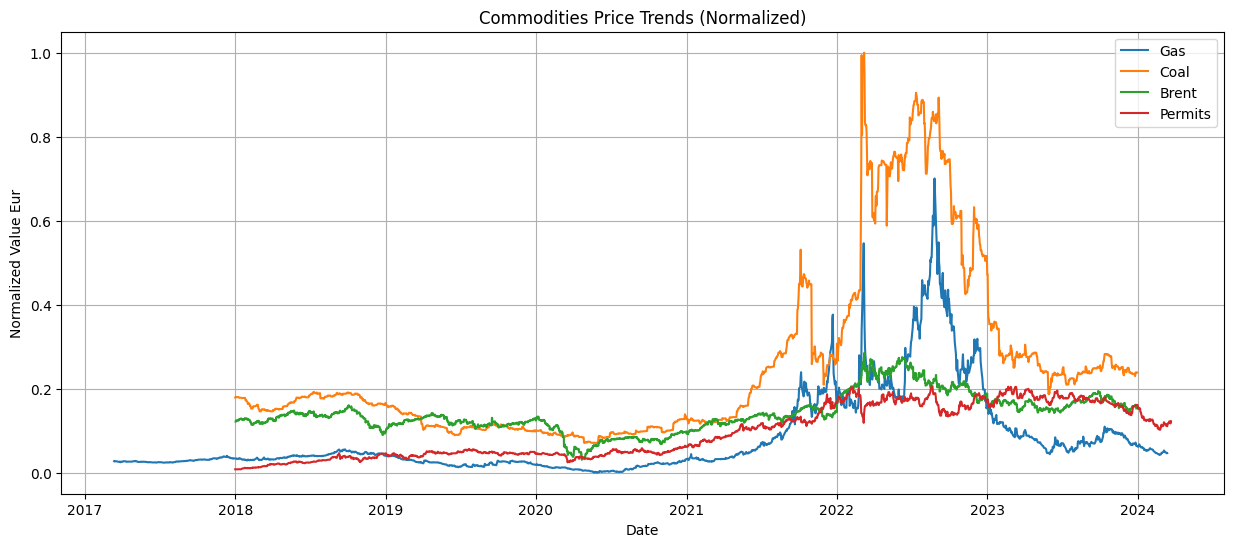

In [56]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming your 'gas', 'coal', and 'brent' DataFrames have been preprocessed to have a datetime index
# and assuming 'permit' DataFrame is also prepared similarly
# Here we create the scaler object
scaler = MinMaxScaler()

# Assuming 'Value' is the column with the prices to be normalized
# Fit the scaler on all data then transform each separately to maintain the shape of each series
all_prices = pd.concat([gas, coal['CoalPriceEur'], brent['oilPriceEur'], permit], axis=0)
scaler.fit(all_prices.values.reshape(-1, 1))  # Reshape to a 2D array for the scaler

# Transform each series
gas_filtered = pd.DataFrame(scaler.transform(gas.values.reshape(-1, 1)), index=gas.index, columns=['Value'])
coal_filtered = pd.DataFrame(scaler.transform(coal['CoalPriceEur'].values.reshape(-1, 1)), index=coal.index, columns=['CoalPriceEur'])
brent_filtered = pd.DataFrame(scaler.transform(brent['oilPriceEur'].values.reshape(-1, 1)), index=brent.index, columns=['oilPriceEur'])
permit_filtered = pd.DataFrame(scaler.transform(permit.values.reshape(-1, 1)), index=permit.index, columns=['PermitPrice'])

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(gas_filtered.index, gas_filtered, label='Gas')
plt.plot(coal_filtered.index, coal_filtered, label='Coal')
plt.plot(brent_filtered.index, brent_filtered, label='Brent')
plt.plot(permit_filtered.index, permit_filtered, label='Permits')

plt.title('Commodities Price Trends (Normalized)')
plt.xlabel('Date')
plt.ylabel('Normalized Value Eur')
plt.legend()
plt.grid(True)
plt.show()


In [57]:
coal

,CoalPriceUsd,CoalPriceEur
Date,,
2018-01-01,95.60,85.160480
2018-01-02,96.65,86.095820
2018-01-03,96.45,85.917660
2018-01-04,96.15,85.650420
2018-01-05,96.25,85.739500
...,...,...
2023-12-27,117.50,112.247750
2023-12-28,117.25,112.008925
2023-12-29,117.60,112.343280


In [60]:
brent["oilPriceEur"]

Date
2018-01-02 00:00:00    59.300556
2018-01-02 01:00:00    59.300556
2018-01-02 02:00:00    59.300556
2018-01-02 03:00:00    59.300556
2018-01-02 04:00:00    59.300556
                         ...    
2023-12-28 20:00:00    74.885967
2023-12-28 21:00:00    74.885967
2023-12-28 22:00:00    74.885967
2023-12-28 23:00:00    74.885967
2023-12-29 00:00:00    73.596312
Name: oilPriceEur, Length: 52489, dtype: float64

In [59]:
gas

,GasPrice
Date,
2017-03-13,16.55
2017-03-14,16.18
2017-03-15,16.45
2017-03-16,16.57
2017-03-17,16.35
...,...
2024-03-07,26.24
2024-03-08,26.55
2024-03-11,25.40
